In [1]:
import sys
import localSettings as ls
print(ls.main_path)

/Users/elenag/Desktop/PlotterLEE/PELEE/


In [2]:
main_path = ls.main_path
sys.path.append(main_path)

In [3]:
from datetime import datetime
now = datetime.now()
date_time = now.strftime("%m%d%Y")
print("date and time:",date_time)

date and time: 07212020


In [4]:
import plotterPOT
import importlib
importlib.reload(plotterPOT)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

In [5]:
tree = "NeutrinoSelectionFilter"

BNB = ""
EXT = ""
NU  = ""
NUE = ""
DRT = ""


#BNB = 'neutrinoselection_filt_run1_NuMI_beamon' +ls.APPEND
BNB = 'neutrinoselection_filt_run1_beamon_beamgood' +ls.APPEND
EXT = 'neutrinoselection_filt_run1_beamoff'         +ls.APPEND
NU  = 'neutrinoselection_filt_run1_overlay'         +ls.APPEND
NUE = 'neutrinoselection_filt_run1_overlay'         +ls.APPEND
DRT = 'neutrinoselection_filt_run1_dirt_overlay'    +ls.APPEND

mc   = uproot.open(ls.ntuple_path+NU +".root")[ls.fold][tree]
nue  = uproot.open(ls.ntuple_path+NUE+".root")[ls.fold][tree]
data = uproot.open(ls.ntuple_path+BNB+".root")[ls.fold][tree]
ext  = uproot.open(ls.ntuple_path+EXT+".root")[ls.fold][tree]
dirt = uproot.open(ls.ntuple_path+DRT+".root")[ls.fold][tree]

print (ls.ntuple_path+DRT+".root")
uproot_v = [mc,nue,ext,data,dirt]

variables = [ "selected", "topological_score",  "shr_dedx_Y",
             "contained_fraction", "nslice","nu_pdg","category","ccnc","slnunhits","slnhits",
            "backtracked_pdg","shr_bkt_pdg" ,"trk_bkt_pdg","flash_time","flash_pe","reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z","trk_len",
            'trk_len_v','trk_sce_start_x_v','trk_sce_start_y_v','trk_sce_start_z_v',
             'trk_sce_end_x_v','trk_sce_end_y_v','trk_sce_end_z_v',
             'trk_score_v', "shr_bkt_pdg", "p", "pt", "selected", "nu_pdg", "shr_theta",
              "nu_flashmatch_score","best_cosmic_flashmatch_score","best_obviouscosmic_flashmatch_score","CosmicIP","true_e_visible",
            "true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z"]
'''
    "slpdg", "trk_score_v", "backtracked_pdg", # modified from shr_score_v
    "shr_pfp_id_v", 
    "shr_tkfit_dedx_U","shr_tkfit_dedx_V","shr_tkfit_dedx_Y",
    "shr_tkfit_gap10_dedx_U","shr_tkfit_gap10_dedx_V","shr_tkfit_gap10_dedx_Y",
    "shr_tkfit_2cm_dedx_U","shr_tkfit_2cm_dedx_V","shr_tkfit_2cm_dedx_Y",
    "shr_energy_tot", 
    "trk_energy_tot", "shr_hits_tot", "ccnc", "trk_chipr",
    "trk_bkt_pdg", "hits_ratio", "n_tracks_contained", 
    #"crtveto","crthitpe","_closestNuCosmicDist",
    "NeutrinoEnergy2",
    "run","sub","evt",
    "CosmicIP","CosmicDirAll3D","CosmicIPAll3D",
    "nu_flashmatch_score","best_cosmic_flashmatch_score","best_obviouscosmic_flashmatch_score",
    #"trk_pfp_id",
    "shrmoliereavg","shrmoliererms",
    "shr_tkfit_npointsvalid","shr_tkfit_npoints", # fitted vs. all hits for shower
    "shrclusfrac0","shrclusfrac1","shrclusfrac2", # track-fitted hits / all hits
    "trkshrhitdist2", # "trkshrhitdist0","trkshrhitdist1", distance between track and shower in 2D
    "shrsubclusters0","shrsubclusters1","shrsubclusters2", # number of sub-clusters in shower
    "trk_llr_pid_score_v", # trk-PID score
    "trk_energy_proton_v", # track energy under proton hyp
    "trk_calo_energy_y_v", # track calo energy
    "pi0_energy2_Y", # pi0 tagger variables
    "_opfilter_pe_beam", "_opfilter_pe_veto", # did the event pass the common optical filter (for MC only)
    "reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z",
    "nproton", "nu_e", "n_showers_contained", "shr_distance", "trk_distance",
    "hits_y", "shr_pz", "shr_energy", "shr_dedx_U", "shr_dedx_V", "shr_phi", "trk_phi", "trk_theta",
    "shr_tkfit_dedx_U", "shr_tkfit_dedx_V", "run", "sub", "evt", "nproton", "trk_pid_chipr_v",
    "trk_len", "mc_pdg", "slnunhits", "slnhits", "shr_score", "trk_score", "trk_hits_tot",
    "true_e_visible", "matched_E", "shr_bkt_E", "trk_bkt_E", "trk_energy", "tksh_distance", "tksh_angle",
    #"npi0","npion","pion_e","muon_e","pi0truth_elec_etot",
    #"anglediff_Y",
    "pi0_e", "shr_energy_tot_cali", "shr_dedx_Y_cali", "evnunhits", "nslice", "interaction",
    #"slclustfrac", "reco_nu_vtx_x", "reco_nu_vtx_y", "reco_nu_vtx_z","contained_fraction",
    "secondshower_Y_nhit","secondshower_Y_vtxdist","secondshower_Y_dot","secondshower_Y_dir","shrclusdir2",
    "shr_tkfit_nhits_Y","shr_tkfit_nhits_U","shr_tkfit_nhits_V",
    "shr_tkfit_2cm_nhits_Y","shr_tkfit_2cm_nhits_U","shr_tkfit_2cm_nhits_V",
    "shr_tkfit_gap10_nhits_Y","shr_tkfit_gap10_nhits_U","shr_tkfit_gap10_nhits_V",
    "pfnhits","pfnunhits"]
'''
#make the list unique
variables = list(set(variables))
print(variables)

    
WEIGHTS = ["weightSpline","weightSplineTimesTune"]#, "weightTune", weightsGenie", "weightsFlux", "weightsReint"]
WEIGHTSLEE = ["weightSpline", "leeweight", "weightSplineTimesTune"]#,"weightTune", weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS = []#"mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
           #"mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
           #"mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]
SYSTEMATICS = []#  ['weightsFlux','weightsGenie']

nue  = nue.pandas.df(variables + WEIGHTS + SYSTEMATICS, flatten=False)
mc   = mc.pandas.df(variables + WEIGHTS + MCFVARS + SYSTEMATICS, flatten=False)
data = data.pandas.df(variables, flatten=False)
ext  = ext.pandas.df(variables, flatten=False)
dirt = dirt.pandas.df(variables + WEIGHTS + SYSTEMATICS, flatten=False)


/Users/elenag/Desktop/PlotterLEE/root_files/neutrinoselection_filt_run1_dirt_overlay.root
['flash_pe', 'reco_nu_vtx_sce_z', 'trk_sce_start_z_v', 'selected', 'nslice', 'ccnc', 'best_cosmic_flashmatch_score', 'shr_dedx_Y', 'best_obviouscosmic_flashmatch_score', 'CosmicIP', 'topological_score', 'trk_sce_end_x_v', 'slnhits', 'p', 'true_nu_vtx_y', 'shr_bkt_pdg', 'backtracked_pdg', 'trk_len_v', 'category', 'trk_score_v', 'nu_flashmatch_score', 'trk_sce_start_x_v', 'trk_sce_end_y_v', 'trk_len', 'trk_bkt_pdg', 'reco_nu_vtx_sce_x', 'trk_sce_start_y_v', 'pt', 'true_nu_vtx_z', 'nu_pdg', 'shr_theta', 'true_e_visible', 'flash_time', 'slnunhits', 'reco_nu_vtx_sce_y', 'trk_sce_end_z_v', 'true_nu_vtx_x', 'contained_fraction']


In [6]:
df_v = [mc,nue,dirt]
for i,df in enumerate(df_v):
    ##df['weightSplineTimesTune' ] = 1.
    ##df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    ##df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    ##df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    ##df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
    df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1.
#   # #df['weightSpline']  = df['weightSpline']  * df['weightTune']
#    ##df.loc[ df['npi0'] > 0, 'weightSplineTimesTune' ] = df['weightSpline'] * df['weightTune'] * 0.7 #scale down pi0s

In [ ]:
df_v = [mc,nue,ext,data,dirt]
for i,df in enumerate(df_v):
    print(df.shape)
    df['trk_sce_max_y_v'] = df.apply(lambda x: np.array([x['trk_sce_start_y_v'],x['trk_sce_end_y_v']]).max(axis=0), axis=1)
    df['trk_sce_min_y_v'] = df.apply(lambda x: np.array([x['trk_sce_start_y_v'],x['trk_sce_end_y_v']]).min(axis=0), axis=1)
    df['trk_sce_max_x_v'] = df.apply(lambda x: np.array([x['trk_sce_start_x_v'],x['trk_sce_end_x_v']]).max(axis=0), axis=1)
    df['trk_sce_min_x_v'] = df.apply(lambda x: np.array([x['trk_sce_start_x_v'],x['trk_sce_end_x_v']]).min(axis=0), axis=1)


In [7]:
#reset timing
df_v = [mc,nue,dirt]
for i,df in enumerate(df_v):
        df.loc[ :, 'flash_time' ] = df['flash_time' ] - 0.304

df_v = [ext]
for i,df in enumerate(df_v):
        df.loc[ :, 'flash_time' ] = df['flash_time' ] - 0.359


In [79]:
nue = mc.query("(abs(nu_pdg) == 12 & ccnc == 0)")
samples = {
    "mc": mc,
    "nue": nue,
    "dirt": dirt,
    "data": data,
    "ext": ext
}

scaling = 1
pot = 8.885e+19 #9.789e+19 
mcratio   = pot/2.07136e+21
dirtratio = pot/1.42143e+21
extratio  = 2347745.0/4015961.99
SPLIT = 1.0
scalingEXT = 0.98
scalingDRT = 0.45
weights = { #full sample mc = 0.38
            "mc"  : mcratio  * SPLIT * scaling,   
            "nue" : mcratio  * SPLIT * scaling,  
            "ext" : extratio * SPLIT * scalingEXT,
            "dirt": dirtratio* SPLIT * scalingDRT,
}

my_plotter = plotterPOT.plotterPOT(samples, weights, pot=pot)
print(weights)

{'mc': 0.04289452340491271, 'nue': 0.04289452340491271, 'ext': 0.5729113237946756, 'dirt': 0.02812836369008674}


In [80]:
import plotterPOT
import importlib
importlib.reload(plotterPOT)

<module 'plotterPOT' from '/Users/elenag/Desktop/PlotterLEE/PELEE/plotterPOT.py'>

(0.95, 1.1)

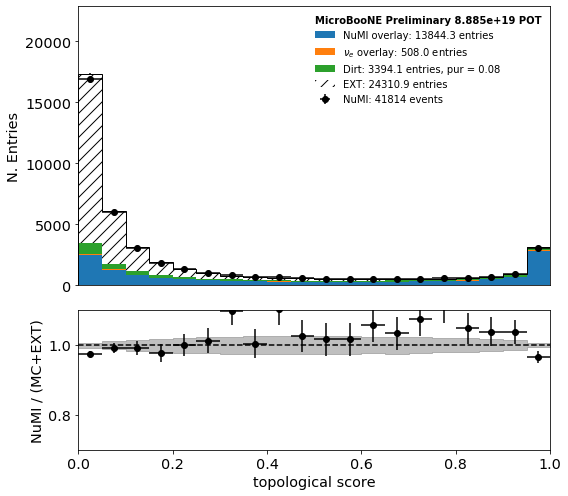

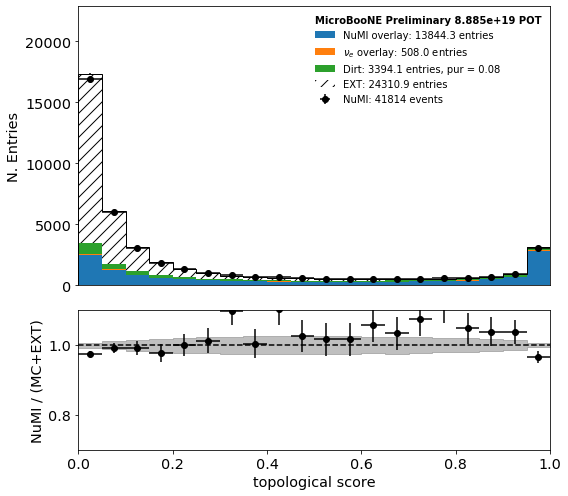

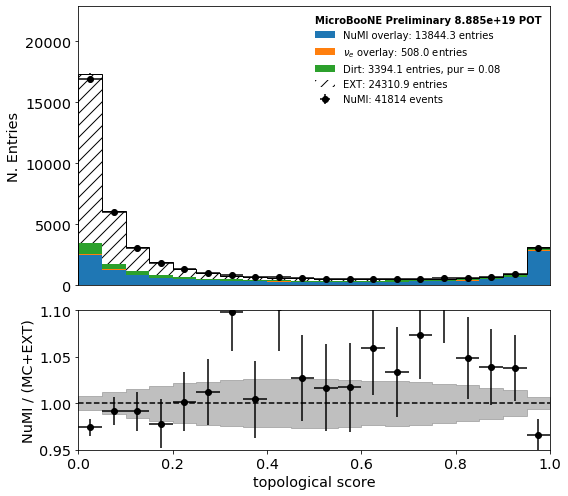

In [81]:
#QUERY = PRESQ
#VARIABLE, BINS, RANGE, XTIT = 'n_tracks_contained',10,(-0.5,9.5),"n tracks contained"
PRESQ1 = 'nslice == 0 and flash_time > 6 and flash_time < 16'# and reco_nu_vtx_sce_x < 5'# and flash_pe > 3800 and nu_flashmatch_score < 20'
PRESQ2 = 'nslice == 1'# and flash_time > 6 and flash_time < 16'# and reco_nu_vtx_sce_x < 5'# and flash_pe > 3800 and nu_flashmatch_score < 20'
PRESQ3 = 'nslice >= 0'# and flash_time > 6 and flash_time < 16'# and reco_nu_vtx_sce_x < 5'# and flash_pe > 3800 and nu_flashmatch_score < 20'
#PRESQ += ' and selected == 1'flash_time
#VARIABLE, BINS, RANGE, XTIT = 'flash_pe',100,(0.,10000),"flash pe"
#VARIABLE, BINS, RANGE, XTIT = 'true_nu_vtx_z',60,(-300,1000),"true nu vtx z [cm]"

#VARIABLE, BINS, RANGE, XTIT = 'flash_time',1,(6,16.),"flash time [us]"
VARIABLE, BINS, RANGE, XTIT = 'topological_score',20,(0,1.),"topological score"

fig, ax1, ax2 = my_plotter.plot_variable(
    VARIABLE,   
    query=PRESQ3,
    #kind="event_category",
    #kind="interaction",
    kind="sample",
    #kind='particle_pdg',
    draw_sys=False,
    stacksort=3,
    title=XTIT,
    #bins=asymm_bins,
    bins=BINS,
    range=RANGE
)[0:3]

ax1.set_ylim(0,ax1.get_ylim()[1]*1.25)
ax2.set_ylim(0.7,1.1)

fig, ax1, ax2 = my_plotter.plot_variable(
    VARIABLE,   
    query=PRESQ2,
    #kind="event_category",
    #kind="interaction",
    kind="sample",
    #kind='particle_pdg',
    draw_sys=False,
    stacksort=3,
    title=XTIT,
    #bins=asymm_bins,
    bins=BINS,
    range=RANGE
)[0:3]

ax1.set_ylim(0,ax1.get_ylim()[1]*1.25)
ax2.set_ylim(0.7,1.1)

fig, ax1, ax2 = my_plotter.plot_variable(
    VARIABLE,   
    query=PRESQ3,
    #kind="event_category",
    #kind="interaction",
    kind="sample",
    #kind='particle_pdg',
    draw_sys=False,
    stacksort=3,
    title=XTIT,
    #bins=asymm_bins,
    bins=BINS,
    range=RANGE
)[0:3]

ax1.set_ylim(0,ax1.get_ylim()[1]*1.25)
ax2.set_ylim(0.95,1.1)

#fig.savefig(ls.plots_path+"run1/presel/"+VARIABLE+"_"+date_time+".pdf")

In [ ]:
QUERY =  'nslice == 1 and flash_time > 6 and flash_time < 16 and reco_nu_vtx_sce_x < 5'

plots = []
plots.append(['nu_flashmatch_score',100,(0,200),"nu flashmatch score"])
plots.append(['best_cosmic_flashmatch_score',100,(0,400),"best cosmic flashmatch score"])
plots.append(['best_obviouscosmic_flashmatch_score',100,(0,400),"best obvcosmic flashmatch score"])
plots.append(['flash_pe',100,(0,10000),"flash pe"])

'''
fig, ax1, ax2 = my_plotter.plot_2d("flash_pe",
                                   "nu_flashmatch_score", 
                                   query=QUERY, 
                                   kind="sample",
                                   bins_x = 100,
                                   bins_y = 100,
                                   range_x =(0,10000),
                                   range_y =(0,400),)
'''
for VARIABLE, BINS, RANGE, XTIT in plots:
    print(VARIABLE, BINS, RANGE, XTIT)
    fig, ax1, ax2 = my_plotter.plot_variable(
        VARIABLE,   
        query=QUERY,
        #kind="event_category",
        #kind="interaction",
        kind="sample",
        draw_sys=False,
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE,
    )[0:3]
    fig.show()
#    fig.savefig(ls.plots_path+"/run1/presel/"+VARIABLE+date_time+".pdf")

In [ ]:
# how to get the LLR-PID value for the "track candidate" (proton for nue selection, muon for numu)
# can be done for any variable
# code from Giuseppe!

'''
df_v = [mc,nue,ext,data,dirt]

for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_llr_pid_v = up.array('trk_llr_pid_score_v')
    trk_energy_proton_v = up.array('trk_energy_proton_v')
    trk_calo_energy_y_v = up.array('trk_calo_energy_y_v')
    trk_id = up.array('trk_id')-1 # I think we need this -1 to get the right result
    trk_llr_pid_v_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
    trk_energy_proton_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_energy_proton_v,trk_id)])
    trk_calo_energy_y_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_calo_energy_y_v,trk_id)])
    df['trkpid'] = trk_llr_pid_v_sel
    df['protonenergy'] = trk_energy_proton_sel
    df['trackcaloenergy'] = trk_calo_energy_y_sel
    df['subcluster'] = df['shrsubclusters0'] + df['shrsubclusters1'] + df['shrsubclusters2']
    df['trkfit'] = df['shr_tkfit_npointsvalid'] / df['shr_tkfit_npoints']
    #df['anglediff_Y'] = np.abs(df['secondshower_Y_dir']-df['shrclusdir2'])
    #df['FMdiffOBV'] = df['nu_flashmatch_score']-df['best_obviouscosmic_flashmatch_score']
    #df['FMdiff'] = df['nu_flashmatch_score']-df['best_cosmic_flashmatch_score']
'''

In [ ]:
df_v = [mc,nue,ext,data,dirt]

for i,df in enumerate(df_v):
    df['shr_tkfit_nhits_tot'] = (df['shr_tkfit_nhits_Y']+df['shr_tkfit_nhits_U']+df['shr_tkfit_nhits_V'])
    df['shr_tkfit_dedx_avg'] = (df['shr_tkfit_nhits_Y']*df['shr_tkfit_dedx_Y'] + df['shr_tkfit_nhits_U']*df['shr_tkfit_dedx_U'] + df['shr_tkfit_nhits_V']*df['shr_tkfit_dedx_V'])/df['shr_tkfit_nhits_tot']
    df['shr_tkfit_2cm_nhits_tot'] = (df['shr_tkfit_2cm_nhits_Y']+df['shr_tkfit_2cm_nhits_U']+df['shr_tkfit_2cm_nhits_V'])
    df['shr_tkfit_2cm_dedx_avg'] = (df['shr_tkfit_2cm_nhits_Y']*df['shr_tkfit_2cm_dedx_Y'] + df['shr_tkfit_2cm_nhits_U']*df['shr_tkfit_2cm_dedx_U'] + df['shr_tkfit_2cm_nhits_V']*df['shr_tkfit_2cm_dedx_V'])/df['shr_tkfit_2cm_nhits_tot']
    df['shr_tkfit_gap10_nhits_tot'] = (df['shr_tkfit_gap10_nhits_Y']+df['shr_tkfit_gap10_nhits_U']+df['shr_tkfit_gap10_nhits_V'])
    df['shr_tkfit_gap10_dedx_avg'] = (df['shr_tkfit_gap10_nhits_Y']*df['shr_tkfit_gap10_dedx_Y'] + df['shr_tkfit_gap10_nhits_U']*df['shr_tkfit_gap10_dedx_U'] + df['shr_tkfit_gap10_nhits_V']*df['shr_tkfit_gap10_dedx_V'])/df['shr_tkfit_gap10_nhits_tot']
    
#df.loc[:,'shr_tkfit_2cm_dedx_max'] = df['shr_tkfit_2cm_dedx_Y']
#df.loc[(df['shr_tkfit_2cm_nhits_U']>df['shr_tkfit_2cm_nhits_Y']),'shr_tkfit_2cm_dedx_max'] = df['shr_tkfit_2cm_dedx_U']
#df.loc[(df['shr_tkfit_2cm_nhits_V']>df['shr_tkfit_2cm_nhits_Y']) & (df['shr_tkfit_2cm_nhits_V']>df['shr_tkfit_2cm_nhits_U']),'shr_tkfit_2cm_dedx_max'] = df['shr_tkfit_2cm_dedx_V']

In [ ]:
df_v = [mc,nue,ext,data,dirt]
for i,df in enumerate(df_v):
    df['shr_tkfit_nhits_tot'] = (df['shr_tkfit_nhits_Y']+df['shr_tkfit_nhits_U']+df['shr_tkfit_nhits_V'])
    df['shr_tkfit_dedx_avg'] = (df['shr_tkfit_nhits_Y']*df['shr_tkfit_dedx_Y'] + df['shr_tkfit_nhits_U']*df['shr_tkfit_dedx_U'] + df['shr_tkfit_nhits_V']*df['shr_tkfit_dedx_V'])/df['shr_tkfit_nhits_tot']
    df['shr_tkfit_2cm_nhits_tot'] = (df['shr_tkfit_2cm_nhits_Y']+df['shr_tkfit_2cm_nhits_U']+df['shr_tkfit_2cm_nhits_V'])
    df['shr_tkfit_2cm_dedx_avg'] = (df['shr_tkfit_2cm_nhits_Y']*df['shr_tkfit_2cm_dedx_Y'] + df['shr_tkfit_2cm_nhits_U']*df['shr_tkfit_2cm_dedx_U'] + df['shr_tkfit_2cm_nhits_V']*df['shr_tkfit_2cm_dedx_V'])/df['shr_tkfit_2cm_nhits_tot']
    df['shr_tkfit_gap10_nhits_tot'] = (df['shr_tkfit_gap10_nhits_Y']+df['shr_tkfit_gap10_nhits_U']+df['shr_tkfit_gap10_nhits_V'])
    df['shr_tkfit_gap10_dedx_avg'] = (df['shr_tkfit_gap10_nhits_Y']*df['shr_tkfit_gap10_dedx_Y'] + df['shr_tkfit_gap10_nhits_U']*df['shr_tkfit_gap10_dedx_U'] + df['shr_tkfit_gap10_nhits_V']*df['shr_tkfit_gap10_dedx_V'])/df['shr_tkfit_gap10_nhits_tot']
    df.loc[:,'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_Y']
    df.loc[(df['shr_tkfit_nhits_U']>df['shr_tkfit_nhits_Y']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_U']
    df.loc[(df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_Y']) & (df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_U']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_V']

In [ ]:
INTERCEPT = 0.0
SLOPE = 0.83

# define some energy-related variables
for i,df in enumerate(df_v):
    df["reco_e"] = (df["shr_energy_tot_cali"] + INTERCEPT) / SLOPE + df["trk_energy_tot"]
    df["reco_e_qe"] = 0.938*((df["shr_energy"]+INTERCEPT)/SLOPE)/(0.938 - ((df["shr_energy"]+INTERCEPT)/SLOPE)*(1-np.cos(df["shr_theta"])))
    df["reco_e_rqe"] = df["reco_e_qe"]/df["reco_e"]

# and a way to filter out data
for i,df in enumerate(df_v):
    df["bnbdata"] = np.zeros_like(df["shr_energy"])
    df["extdata"] = np.zeros_like(df["shr_energy"])

data["bnbdata"] = np.ones_like(data["shr_energy"])
ext["extdata"] = np.ones_like(ext["shr_energy"])


# test calibrating dedx on Y plane
#data["shr_tkfit_gap10_dedx_Y"] = data["shr_tkfit_gap10_dedx_Y"]*1.03
#ext["shr_tkfit_gap10_dedx_Y"] = ext["shr_tkfit_gap10_dedx_Y"]*1.03
#data["shr_tkfit_2cm_dedx_Y"] = data["shr_tkfit_2cm_dedx_Y"]*1.03
#ext["shr_tkfit_2cm_dedx_Y"] = ext["shr_tkfit_2cm_dedx_Y"]*1.03
#data["shr_tkfit_dedx_Y"] = data["shr_tkfit_dedx_Y"]*1.03
#ext["shr_tkfit_dedx_Y"] = ext["shr_tkfit_dedx_Y"]*1.03

In [ ]:
# avoid double-counting of events out of FV in the NC/CC pi0 samples
# not needed anymore since we improved matching with filtered samples
#ncpi0 = ncpi0.query('category != 5')
#ccpi0 = ccpi0.query('category != 5')
#ccnopi = ccnopi.query('category != 5')
#nccpi = nccpi.query('category != 5')
#ncnopi = ncnopi.query('category != 5')

## avoid recycling unbiased ext events (i.e. selecting a slice with little nu content from these samples)
#ccnopi = ccnopi.query('(nslice==0 | (slnunhits/slnhits)>0.1)')
#cccpi = cccpi.query('(nslice==0 | (slnunhits/slnhits)>0.1)')
#ncnopi = ncnopi.query('(nslice==0 | (slnunhits/slnhits)>0.1)')
#nccpi = nccpi.query('(nslice==0 | (slnunhits/slnhits)>0.1)')

# add back the cosmic category, for background only
df_v = [mc,nue,ext,data,dirt]
#df_v = [ext,data]

for i,df in enumerate(df_v):
    df.loc[(df['category']!=1)&(df['category']!=10)&(df['category']!=11)&(df['category']!=111)&(df['slnunhits']/df['slnhits']<0.2), 'category'] = 4

In [ ]:
data["is_signal"] = data["category"] == 11
nue ["is_signal"] = nue["category"] == 11
mc  ["is_signal"] = mc["category"] == 11
ext["is_signal"] = ext["category"] == 11
dirt["is_signal"] = dirt["category"] == 11

In [ ]:
dfbdt_v = [mc,nue,ext,data,dirt]


In [ ]:
import plotterPOT
import importlib
importlib.reload(plotter)

In [ ]:
nue = mc.query("(abs(nu_pdg) == 12 & ccnc == 0)")
samples = {
    "mc": mc,
    "nue": nue,
    "dirt": dirt,
    "data": data,
    "ext": ext
}

scaling = 1
#data pot from Zarko 4.801e+19
#mc   pot from Krish 1.26178e+20      data/ mc   = 0.38049422244
#dirt pot from Krish 6.4e20           data/ dirt = 0.075015625
# Data/Ext = 1123435.0/2040193.0 = 0.550651335
pot = 4.831e+19
mcratio   = pot/2.07136e+20 #1.26178e20 
dirtratio = pot/6.4e20 
extratio  = 1123435.0/2987202.8600
SPLIT = 1.0

weights = { #full sample mc = 0.38
            "mc"  : mcratio  * SPLIT * scaling,   
            "nue" : mcratio  * SPLIT * scaling,  
            "ext" : extratio * SPLIT * scaling, #set0   
            "dirt": dirtratio* SPLIT * scaling, #set0   
}

my_plotter = plotter.Plotter(samples, weights, pot=pot)
print(weights)

In [ ]:
# nue preselection
PRESQ = 'nslice == 1'
PRESQ += ' and selected == 1'
#PRESQ += ' and shr_energy_tot_cali > 0.07'
#PRESQ += ' and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1)'

In [ ]:
#QUERY = PRESQ
#VARIABLE, BINS, RANGE, XTIT = 'n_tracks_contained',10,(-0.5,9.5),"n tracks contained"
PRESQ = 'nslice == 1'
PRESQ += ' and selected == 1'
VARIABLE, BINS, RANGE, XTIT = 'topological_score',100,(0,1.),"topo score"
QUERY = PRESQ
fig, ax1, ax2 = my_plotter.plot_variable(
    VARIABLE,   
    query=QUERY,
    kind="event_category",
    #kind="interaction",
    #kind="sample",
    #kind='particle_pdg',
    draw_sys=False,
    stacksort=3,
    title=XTIT,
    #bins=asymm_bins,
    bins=BINS,
    range=RANGE
)[0:3]

ax1.set_ylim(0,ax1.get_ylim()[1]*1.25)
ax2.set_ylim(0.7,1.1)
#fig.savefig(ls.plots_path+"run1/presel/"+VARIABLE+"_"+date_time+".pdf")

In [ ]:
data.query(QUERY)[["run","sub","evt","reco_e"]]

In [ ]:
QUERY +=  'and nslice==1'#' and reco_e > 0.15 and reco_e < 1.5'
#QUERY += ' and shr_tkfit_dedx_Y < 0'
plots = []
plots.append(['tksh_distance',20,(0,10),"tksh distance [cm]"])
plots.append(['reco_nu_vtx_sce_x',25,(0,250),"reco_nu_vtx_sce_x [cm]"])
#plots.append(['shr_tkfit_dedx_Y',20,(0,10),"shr tkfit dE/dx (Y, 0-4 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_dedx_U',20,(0,10),"shr tkfit dE/dx (U, 0-4 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_dedx_V',20,(0,10),"shr tkfit dE/dx (V, 0-4 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_2cm_dedx_Y',20,(0,10),"shr tkfit dE/dx (Y, 0-2 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_2cm_dedx_U',20,(0,10),"shr tkfit dE/dx (U, 0-2 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_2cm_dedx_V',20,(0,10),"shr tkfit dE/dx (V, 0-2 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_gap10_dedx_Y',20,(0,10),"shr tkfit dE/dx (Y, 1-5 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_gap10_dedx_U',20,(0,10),"shr tkfit dE/dx (U, 1-5 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_gap10_dedx_V',20,(0,10),"shr tkfit dE/dx (V, 1-5 cm) [MeV/cm]"])
plots.append(['shr_tkfit_2cm_dedx_avg',20,(0,10),"shr tkfit dE/dx (avg, 0-2 cm) [MeV/cm]"])
plots.append(['shr_tkfit_2cm_nhits_tot',20,(0,20),"shr tkfit nhits (tot, 0-2 cm) [MeV/cm]"])
plots.append(['shr_tkfit_gap10_dedx_avg',20,(0,10),"shr tkfit dE/dx (avg, 1-5 cm) [MeV/cm]"])
plots.append(['shr_tkfit_gap10_nhits_tot',20,(0,20),"shr tkfit nhits (tot, 1-5 cm) [MeV/cm]"])
plots.append(['tksh_angle',20,(-1,1),"cos(tksh angle)"])
plots.append(['trkfit',20,(0,1),"Fraction of Track-fitted points"])
plots.append(['shrmoliereavg',20,(0,50),"average Moliere angle [degrees]"])
plots.append(['trkpid',15,(-1,1),"track LLR PID"])
plots.append(['n_showers_contained',10,(0,10),"n showers contained"])
plots.append(['n_tracks_contained',10,(0,10),"n tracks contained"])
plots.append(['shr_score',20,(0,0.5),"shr score"])
plots.append(['trk_score',20,(0.5,1.0),"trk score"])
plots.append(['hits_ratio',20,(0,1),"shower hits/all hits"])
#plots.append(['slclustfrac',20,(0,1),"slice clustered fraction"])
#plots.append(['CosmicIP',20,(0,200),"Cosmic IP from vtx [cm]"])
#plots.append(['reco_nu_vtx_x',20,(0,260),"x"])
#plots.append(['reco_nu_vtx_y',20,(-120,120),"y"])
#plots.append(['reco_nu_vtx_z',20,(0,1100),"z"])
#plots.append(['reco_e_rqe',20,(0,2),"rqe"])
plots.append(['trkshrhitdist2',20,(0,10),"2D trk-shr distance (Y)"])
plots.append(['subcluster',20,(0,20),"N sub-clusters in shower"])
plots.append(['shrmoliererms',20,(0,5000),"RMS Moliere angle [degrees]"])
plots.append(['shr_energy_tot_cali',20,(0,1),"shr energy (calibrated) [GeV]"])
plots.append(['contained_fraction',20,(0.,1),"contained fraction"])
plots.append(['hits_y',20,(0.,1000),"N hits Y plane"])
#plots.append(['pi0_mass_Y',25,(-50.,200),"pi0 mass [Mev]"])
#plots.append(['pi0_gammadot',20,(-1,1),"2-shower angle"])
#plots.append(['secondshower_Y_nhit',20,(0,200),"Nhit 2nd shower (Y)"])
#plots.append(['secondshower_Y_dot',20,(-1,1),"cos(2nd shower direction wrt vtx) (Y)"])
#plots.append(['anglediff_Y',20,(0,350),"angle diff 1st-2nd shower (Y) [degrees]"])
#plots.append(['secondshower_Y_vtxdist',20,(0.,200),"vtx dist 2nd shower (Y)"])
plots.append(['CosmicIPAll3D',20,(0,200),"CosmicIPAll3D [cm]"])
plots.append(['CosmicDirAll3D',20,(-1,1),"cos(CosmicDirAll3D)"])
#plots = []
#plots.append(['trkshrhitdist2',20,(0,10),"2D trk-shr distance (Y)"])
if USEBDT:
    plots = []
    plots.append(['pi0_score',20,(0.,1),"$\pi^0$ BDT response"])
    plots.append(['nonpi0_score',20,(0.,1),"non-$\pi^0$ BDT response"])
for VARIABLE, BINS, RANGE, XTIT in plots:
    print(VARIABLE, BINS, RANGE, XTIT)
    fig, ax1, ax2 = my_plotter.plot_variable(
        VARIABLE,   
        query=QUERY,
        kind="event_category",
        #kind="interaction",
        #kind="sample",
        draw_sys=False,
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE,
    )[0:3]
    #ax1.set_ylim(0,ax1.get_ylim()[1]*1.4)
    #ax1.set_yscale("log")
    fig.show()
    fig.savefig(ls.plots_path+"/run1/presel/"+VARIABLE+date_time+".pdf")